**OpenCV-Python** is a library of Python bindings designed to solve computer vision problems. In this project, OpenCV is used for image classification.  

### Imported necessary libraries

In [206]:
import cv2 # importing openCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil  #This module contains functions for operating on files
%matplotlib inline

### Loaded and displayed  image with OpenCV

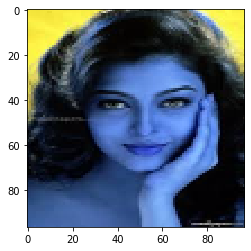

In [207]:
image=cv2.imread("ash_image.jpg") #Loaded image 


#resize image
#resized_img=cv2.resize(img,(300,200))

#resized image 
resized_img=cv2.resize(image,(int(image.shape[1]/2),int(image.shape[1]/2)))
plt.imshow(resized_img)

###   Loaded harcascade xml files for face and eye detection

In [208]:
#loaded face detected harcascade classifier.
face_cascade = cv2.CascadeClassifier('C:/Users/moush/Desktop/data_science_projects/haarcascade_frontalface_default.xml') 


In [209]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #changed the image color to gray
gray_img.shape

(259, 194)

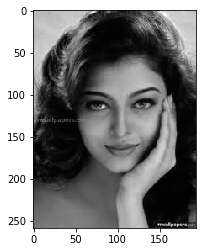

In [210]:
plt.imshow(gray_img, cmap='gray') # gray version of original image

### Face detection

In [211]:
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces

array([[ 40,  63, 133, 133]], dtype=int32)

In [212]:
(x,y,w,h) = faces[0]
x,y,w,h

(40, 63, 133, 133)

-1

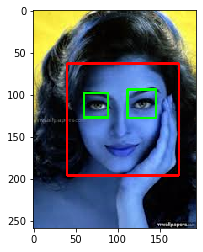

In [213]:
# cv2.rectangle() method is used to draw a rectangle on any image.
plt.imshow(face_img)
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2) #(255, 0, 0) for red color of rectangle.
cv2.waitKey(0)


In [214]:
#loaded eye detected harcascade classifier.
eye_cascade = cv2.CascadeClassifier('C:/Users/moush/Desktop/data_science_projects/haarcascade_eye.xml')

### Face and eye detection

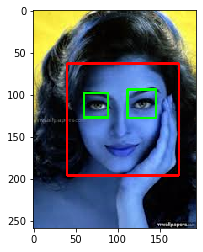

In [215]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

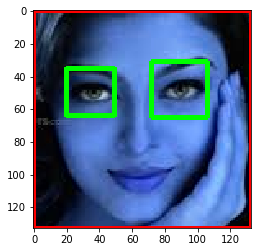

In [216]:

plt.imshow(roi_color, cmap='gray')

In [217]:
# This function will detect and return cropped image with atleast 2 eyes. If eyes are not visible clearly function will return none.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

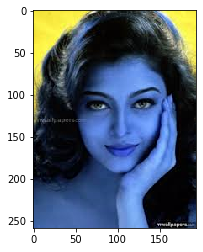

In [218]:
original_image = cv2.imread('ash_image.jpg')
plt.imshow(original_image)

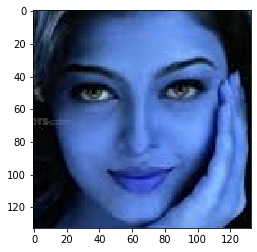

In [219]:
cropped_image = get_cropped_image_if_2_eyes("ash_image.jpg")
plt.imshow(cropped_image)

In [220]:

#path_to_data = "./dataset/"
#path_to_cr_data = "./dataset/cropped/"